In [26]:
import pandas as pd 
df = pd.read_csv('data.csv')
#df = df.dropna()  # drop rows with missing values
#df.info()
df.head(30)      #display first 5 headers
#df.describe()


,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
5,60,102,127,300.0
6,60,110,136,374.0
7,45,104,134,253.3
8,30,109,133,195.1
9,60,98,124,269.0


In [27]:
df.isnull().sum()    #checking for empty cells


Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

In [28]:
#checking for wrong formats
df.dtypes

Duration      int64
Pulse         int64
Maxpulse      int64
Calories    float64
dtype: object

In [29]:
#wrong data  checking for negative values
for col in ['Duration','Pulse','Maxpulse','Calories']:
    if (df[col]<0 ).any():
        print(f"negative values found in column:{col} ")
    

In [30]:
#check for non- numeric values in numeric columns
for col in ['Duration','Pulse','Maxpulse','Calories']:
    if not pd.to_numeric(df[col],errors='coerce').notnull().all():
        print(f"Non-numeric values found in column: {col}")

Non-numeric values found in column: Calories


In [31]:
duplicates=df.duplicated()
if duplicates.any():
    print('Duplicates found:')
    print(df[duplicates])
else:
    print('No duplicates found.')

Duplicates found:
     Duration  Pulse  Maxpulse  Calories
36         60    102       127     300.0
37         60    100       120     300.0
38         60    100       120     300.0
40         45     90       112     180.1
71         60    109       153     387.6
113        45    100       120     225.3
155        60    111       151     368.5


In [32]:
#fill empty values with mean for numeric values

for col in ['Duration','Pulse','Maxpulse','Calories']:
    df[col].fillna(df[col].mean(),inplace=True)

C:\Users\PC 12\AppData\Local\Temp\ipykernel_2448\4042151650.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(),inplace=True)


In [33]:
df.isnull().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64

In [34]:
#ExploratoryDataAnalysis
df.shape


(169, 4)

In [35]:
#summaryStatictics
df.describe()



,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,169.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,262.385991
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,253.300000
50%,60.000000,105.000000,131.000000,321.000000
75%,60.000000,111.000000,141.000000,384.000000
max,300.000000,159.000000,184.000000,1860.400000


Text(0.5, 1.0, 'Duration Distribution')

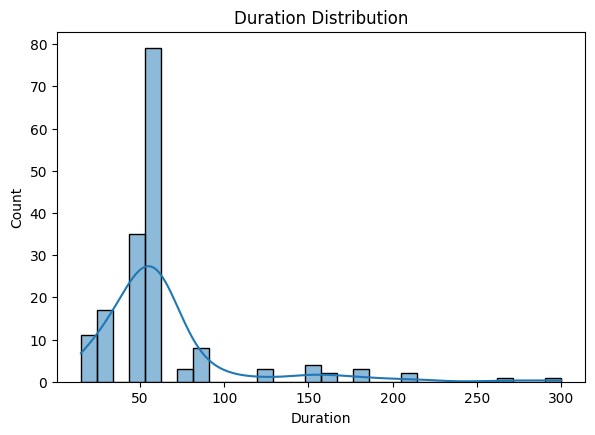

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
#Histogram #setup the figure
plt.figure(figsize=(15,10))

#histogram of Duration
plt.subplot(2,2,1)
sns.histplot(df['Duration'],bins=30,kde=True)
plt.title('Duration Distribution')


Text(0.5, 1.0, 'Pulse Distribution')

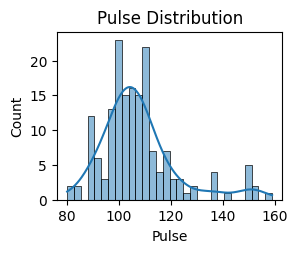

In [37]:
#histogram of Pulse
plt.subplot(2,2,2)
sns.histplot(df['Pulse'],bins=30,kde=True)
plt.title('Pulse Distribution')

Text(0.5, 1.0, 'Calories Distribution')

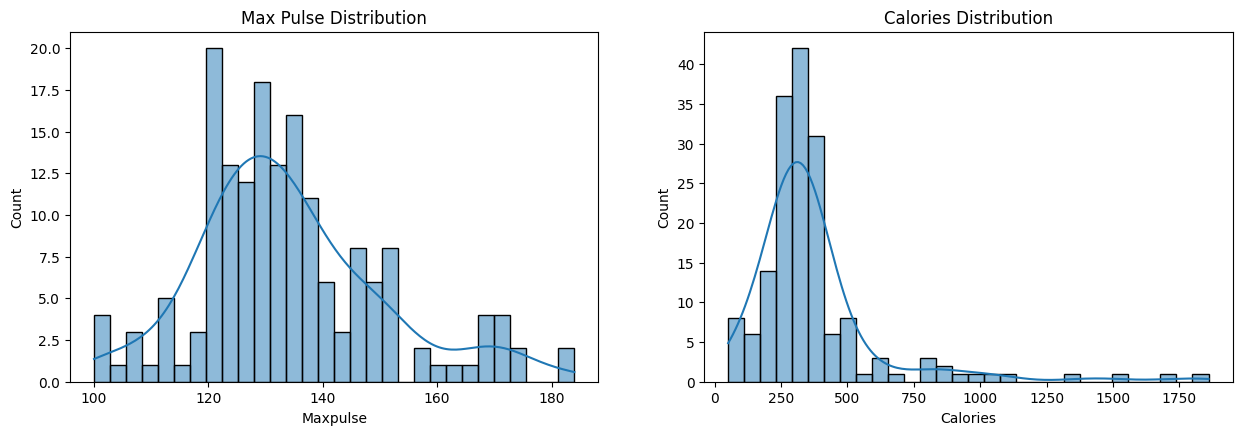

In [38]:
plt.figure(figsize=(15,10))
#histogram of Max pulse
plt.subplot(2,2,1)
sns.histplot(df['Maxpulse'],bins=30,kde=True)
plt.title('Max Pulse Distribution')

#histogram of Calories
plt.subplot(2,2,2)
sns.histplot(df['Calories'],bins=30,kde=True)
plt.title('Calories Distribution')

Text(0.5, 1.0, 'Duration vs Pulse')

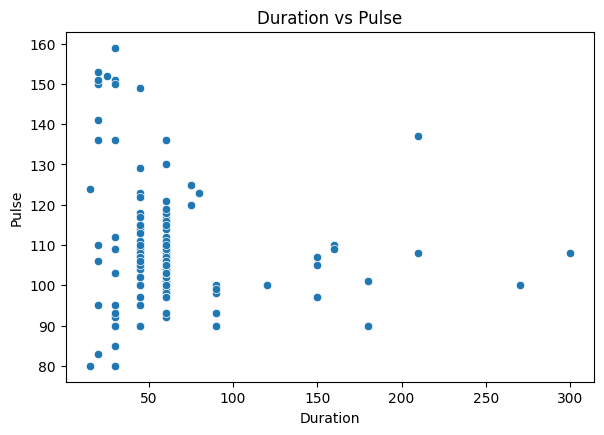

In [39]:
#scatter plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.scatterplot(x='Duration',y='Pulse', data=df)
plt.title('Duration vs Pulse')


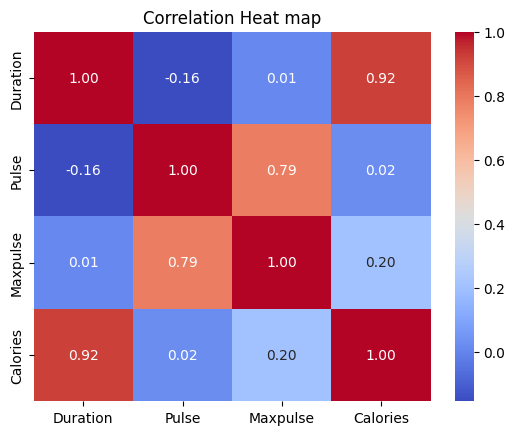

In [40]:
#correlation heat map
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heat map')
plt.show()